Outlier detection using the percentile method is a technique for identifying data points that significantly deviate from the rest of the data. It leverages the concept of percentiles, which divide your data into 100 equal parts. Here's how it works:

**1. Define your threshold:**

Instead of a fixed range like the Interquartile Range (IQR) method, percentiles offer flexibility. You choose specific percentiles, like the 1st and 99th, representing 1% and 99% of the data, respectively. These represent your **threshold**:

* Values below the 1st percentile are potential **low outliers**.
* Values above the 99th percentile are potential **high outliers**.

**2. Identify and address outliers:**

Compare each data point to your chosen thresholds. Any point:

* **Below the 1st percentile:** is considered a **low outlier**.
* **Above the 99th percentile:** is considered a **high outlier**.

**3. Handling outliers:**

You have various options for handling outliers:

* **Removal:** Exclude them from further analysis, but be cautious as it might discard valuable information.
* **Capping:** Replace outliers with the threshold values (1st or 99th percentile). This maintains data size but reduces impact. This technique is called **Winsorization**.
* **Imputation:** Use statistical methods like mean or median to replace outliers with more representative values.
* **Investigation:** Analyze the outliers to understand if they represent genuine anomalies or errors.

**Advantages:**

* Flexible: You can adapt thresholds based on your data and domain knowledge.
* Handles skewed data: Works well with non-normal distributions compared to IQR.
* Transparency: Clear definition of outlier based on chosen percentiles.

**Disadvantages:**

* Subjective choice of thresholds: Requires careful consideration based on context.
* Arbitrary removal of data: May discard valuable information if not done judiciously.
* Potential masking of true outliers: If thresholds are not set carefully, true outliers might remain undetected.

Remember, outlier detection is not about removing "weird" data, but about understanding what deviates from the expected pattern and why. Use the percentile method cautiously, considering its advantages and limitations in the context of your specific data and analysis goals.

Data= https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

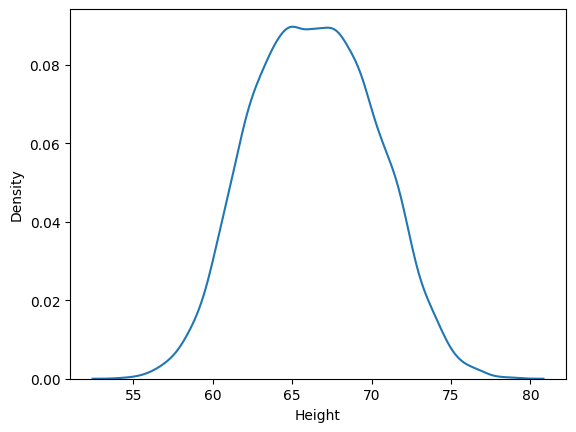

In [6]:
sns.kdeplot(df['Height'])

<Axes: xlabel='Height'>

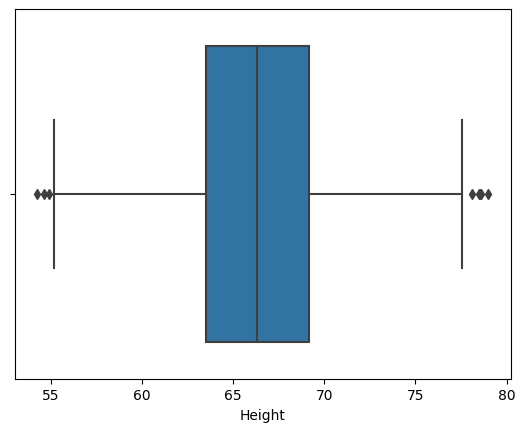

In [7]:
sns.boxplot(x = df['Height'])

In [8]:
upper_limit = np.percentile(df['Height'], 99)
lower_limit = np.percentile(df['Height'], 1)

In [9]:
upper_limit, lower_limit

(74.7857900583366, 58.13441158671655)

In [10]:
df[(df['Height'] >= 74.7857900583366) | (df['Height'] <= 58.13441158671655)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [11]:
new_df = df[(df['Height'] <= 74.7857900583366) & (df['Height'] >= 58.13441158671655)]

In [12]:
new_df.shape

(9800, 3)

In [13]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [14]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

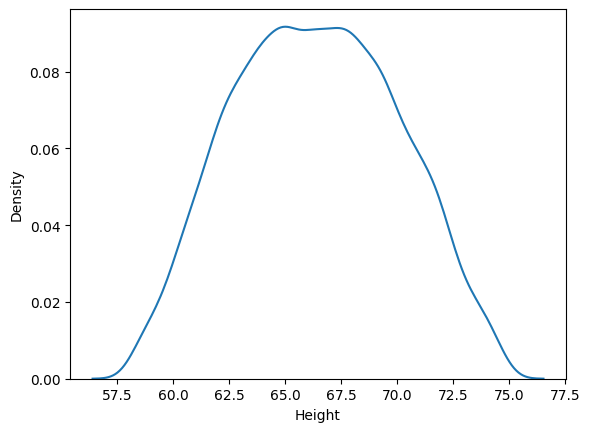

In [15]:
sns.kdeplot(new_df['Height'])

<Axes: xlabel='Height'>

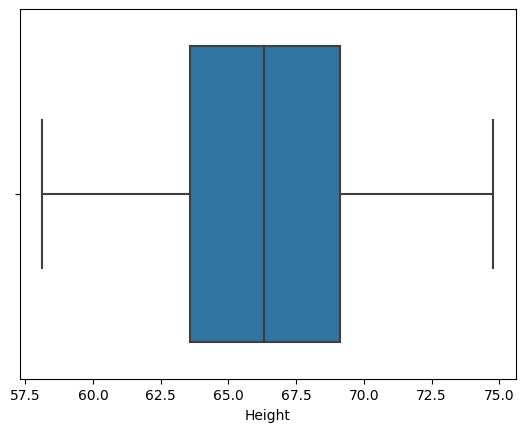

In [16]:
sns.boxplot(x = new_df['Height'])

In [17]:
#no outliers

In [18]:
# Capping --> Winsorization

df['Height'] = np.where(
    df['Height'] >= upper_limit,
    upper_limit,
    np.where(
        df['Height'] <= lower_limit,
        lower_limit,
        df['Height']
    )
)

In [19]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

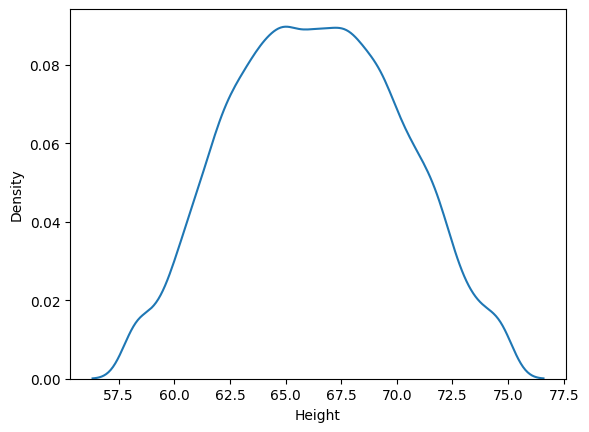

In [20]:
sns.kdeplot(df['Height'])

<Axes: xlabel='Height'>

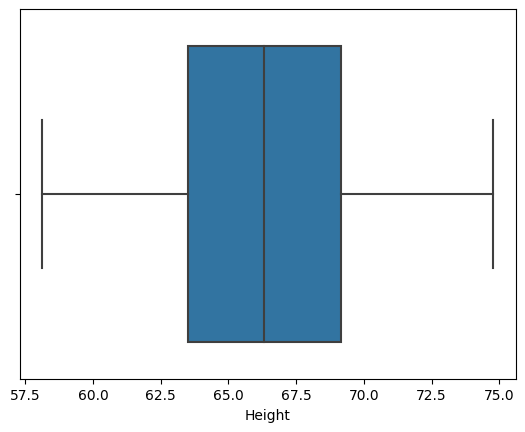

In [21]:
sns.boxplot(x = df['Height'])

The choice between the percentile method (including IQR) and the Z-score method for outlier detection depends on various factors, including the distribution of the data, the presence of skewness or outliers, and the specific requirements of the analysis. Here's a guideline on when to use each method:

1. **Percentile Method (including IQR)**:
   - Use when the data is not normally distributed or when there are outliers that might affect the mean and standard deviation.
   - Suitable for skewed datasets or datasets with a non-standard distribution.
   - Robust against outliers because it relies on the quartiles rather than the mean and standard deviation.
   - Good for identifying outliers in datasets with heavy tails or those that contain extreme values.
   - Particularly useful when the distribution of the data is unknown or when there are concerns about the validity of assuming a normal distribution.

2. **Z-score Method**:
   - Use when the data is approximately normally distributed or can be transformed to approximate normality.
   - Suitable for datasets where the mean and standard deviation provide meaningful information about the spread and central tendency.
   - Useful when a parametric approach is appropriate and when there are no significant outliers or skewness in the data.
   - Provides a standardized measure of deviation from the mean, making it easy to compare across different variables or datasets.
   - May be preferred when the distribution of the data is known or can be reasonably assumed to be normal.

In summary, if you're dealing with non-normally distributed data, skewed distributions, or datasets containing outliers, the percentile method (including IQR) is often a better choice. On the other hand, if the data is approximately normally distributed and there are no significant outliers, the Z-score method can be more suitable. However, it's important to assess the characteristics of your data and consider the assumptions and limitations of each method before making a decision. Additionally, in some cases, using both methods in combination or exploring other outlier detection techniques might provide a more comprehensive analysis.